<div class="usecase-title">UC00150_Waste_Efficiency_Argyle_Square_case_study</div>

<div class="usecase-authors"><b>Authored by: Peregrin J Ryan</b></div>

<div class="usecase-duration"><b>Duration:</b> 30 mins</div>

<div class="usecase-level-skill">
    <div class="usecase-level"><b>Level: </b>Intermediate</div>
    <div class="usecase-skill"><b>Pre-requisite Skills: </b>Python</div>
</div>

<div class="usecase-section-header">Scenario</div>

Melbourne is the host to many events, both national (Melbourne Cup) and international (Tennis Open, Formula One). Because of this the Melbourne city's infrastructure will receive far more stress during these events. One of the most important and most visual for tourists and citizens is waste management. Overflowing bins and rubbish in the street makes the city appear unmaintained and may give the city a poor reputation as well as having the potential for pollution to overflow into parks and nature. As a part of this Melbourne has added smart waste bins in 2022. These bins are solar powered and track multiple data points. While most of the bin data that is collected by these bins isn't public. The bins in Argyle square nearby the CBD are. We can use these bins to investigate how the smart bin program has been going after 3 years (at time of writing) as well as investigate how well the bins are being taken care of, as when hosting large events it's important that Melbourne's infrastructure can support these events.

<div class="usecase-section-header">What this use case will teach you</div>


By going through this use case and engaging with it's content as well as running the code you will have learnt how to do each of these things:


- Collect data from the Melbourne open data (MOP) using API v2.1 GET request.
- How to take our data and prepare it for analysis.
 - Find missing values and learn why 12% of the data had missing values and how to fix it.
- Visualise when bins are out of battery and how that might affect the data.
- Find the average fill level of all readings throughout the day.
- Find the fill level throughout the week.
- Find which bins are used the most.
- Investigate the change in the dataset that had occured in 2024.


<div class="usecase-section-header">Introduction and background relating to problem:</div>

Melborune's smart bin program has been running for years now. And thgis iniative has moved onto other parts of the city, being adopted in the CBD and in surrounding parks. However, electronics that have been operating for years and left out to weather the elements will experience some wear. And long running systems might experience updates or changes. It is our goal to look at how to look at how well these smart bins are operating. to investigatge if 1. They are still providing helpful insights about the operation of waste management within Melbourne. And 2. How well is the waste management being handled as Melborune often experiences heavy usage due to it hosting national and world events throughout the year. We will use the data collected from the Argyle Square park as our case stuydy to answer these two points of analysis. Hopefully as we explore the data we can get insights to both of these points of analysis.

## Datasets used:
Dataset 1: https://data.melbourne.vic.gov.au/explore/dataset/netvox-r718x-bin-sensor/table/?disjunctive.dev_id&sort=-sensor_name


## 1 Import packages
For this project we will need to import a series of packages, these can be installed using the `! pip install` command. Many of these are still easily accessible and maintained at the time of writing.

The only one that is different is the `API_store`. This is a separate file stored that contains the API key (stored as `API = <Insert your key here>`). Simply create the file in the same folder as this one and it should be imported without any issues.

In [1]:
# Imports needed to request and collect data from API
import requests
import pandas as pd
from io import StringIO
# Create this as a local file to store your API key
import API_store
# For data wrangling
import matplotlib.pyplot as plt

## 2 Data Collection
The first step in the data collection process is to make getting the API data as simple as possible, so we will create a function to make getting the data easy.

In [2]:
# This is the function to collect the data from the API
def collect_data(dataset_id):
    base_url = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
    apikey = API_store.API
    dataset_id = dataset_id
    format = 'csv'

    url = f'{base_url}{dataset_id}/exports/{format}'
    params = {
        'select': '*',
        'limit': -1,  # all records
        'lang': 'en',
        'timezone': 'UTC',
        'api_key': apikey
    }

    # GET request
    response = requests.get(url, params=params)

    if response.status_code == 200:
        # StringIO to read the CSV data
        url_content = response.content.decode('utf-8')
        dataset = pd.read_csv(StringIO(url_content), delimiter=';')
        return dataset
    else:
        print(f'Request failed with status code {response.status_code}')

Now we simply collect the data by calling the API with the function we just wrote: (We are calling the API for a large amount of data so it may take a while)

In [3]:
dataset_ids = ['netvox-r718x-bin-sensor']
bin_sensor_df = collect_data(dataset_ids[0])

In [4]:
bin_sensor_df.head(10)

,dev_id,time,temperature,distance,filllevel,battery,lat_long,sensor_name,fill_level
0,r718x-6f0b,2024-10-27T04:02:18+00:00,22.4,65535.0,255.0,3.6,"-37.8020809, 144.9654563",r718x-bin sensor 14,-8877.0
1,r718x-676c,2024-10-27T04:03:05+00:00,21.8,200.0,90.0,3.6,"-37.8031969, 144.9652732",r718x-bin sensor 2,72.0
2,r718x-6f0b,2024-10-13T04:02:04+00:00,22.7,468.0,40.0,3.6,"-37.8020809, 144.9654563",r718x-bin sensor 14,35.0
3,r718x-6f10,2024-10-13T03:03:40+00:00,22.7,202.0,89.0,3.6,NaN,NaN,72.0
4,r718x-6f31,2024-10-13T04:02:36+00:00,23.0,200.0,74.0,3.6,"-37.8022594, 144.9659489",r718x-bin sensor 19,72.0
5,r718x-6f10,2024-10-13T04:03:40+00:00,22.5,202.0,89.0,3.6,NaN,NaN,72.0
6,r718x-6f0b,2024-10-06T04:01:58+00:00,22.5,65535.0,255.0,3.6,"-37.8020809, 144.9654563",r718x-bin sensor 14,-8877.0
7,r718x-6f34,2024-10-06T03:59:48+00:00,23.5,201.0,74.0,3.6,"-37.802165, 144.9661423",r718x-bin sensor 20,72.0
8,r718x-6f10,2024-10-06T04:03:29+00:00,22.1,203.0,89.0,3.6,NaN,NaN,72.0
9,r718x-6f0b,2024-09-21T17:16:45+00:00,19.8,461.0,41.0,3.6,"-37.8020809, 144.9654563",r718x-bin sensor 14,36.0


## 3 Data Wrangling
With the data collected we can proceed with removing the columns that we aren't using for this use case. This can keep it simple and we can know what we are working with:

### 3.1 Remove unneeded columns


In [5]:
bin_sensor_df = bin_sensor_df.drop(['distance','lat_long','fill_level'],axis=1)
bin_sensor_df.head(10)

,dev_id,time,temperature,filllevel,battery,sensor_name
0,r718x-6f0b,2024-10-27T04:02:18+00:00,22.4,255.0,3.6,r718x-bin sensor 14
1,r718x-676c,2024-10-27T04:03:05+00:00,21.8,90.0,3.6,r718x-bin sensor 2
2,r718x-6f0b,2024-10-13T04:02:04+00:00,22.7,40.0,3.6,r718x-bin sensor 14
3,r718x-6f10,2024-10-13T03:03:40+00:00,22.7,89.0,3.6,NaN
4,r718x-6f31,2024-10-13T04:02:36+00:00,23.0,74.0,3.6,r718x-bin sensor 19
5,r718x-6f10,2024-10-13T04:03:40+00:00,22.5,89.0,3.6,NaN
6,r718x-6f0b,2024-10-06T04:01:58+00:00,22.5,255.0,3.6,r718x-bin sensor 14
7,r718x-6f34,2024-10-06T03:59:48+00:00,23.5,74.0,3.6,r718x-bin sensor 20
8,r718x-6f10,2024-10-06T04:03:29+00:00,22.1,89.0,3.6,NaN
9,r718x-6f0b,2024-09-21T17:16:45+00:00,19.8,41.0,3.6,r718x-bin sensor 14


### 3.2 Check imported data
With the data now only containing what we need. Let's look at the size of the dataframe we are working with. And we need to check if we are missing any values. Since that will affect our investigation.

In [6]:
# Print the length of each dataset, can be compared to the API website to see if it matches and to know the size of our datasets
print(f'The datasets collected are: \n-bin_sensor_df: length {len(bin_sensor_df)}\n')
print("Lets check if there are any null values:")
print("Bin data: ")
print("are any values null-->",bin_sensor_df.isnull().values.any())

The datasets collected are: 
-bin_sensor_df: length 1014902

Lets check if there are any null values:
Bin data: 
are any values null--> True


There are missing values in our dataframe so we can check where they are and see how many columns contain missing values:

In [7]:
# Print a formatted readout to see what values are missing from each column, then give a percentage of missing data
print(f"Missing data:\n{bin_sensor_df.isnull().sum()}\n------\n",
      f"Total missing values: {len(bin_sensor_df[bin_sensor_df.isnull().any(axis=1)])}\nTotal values: {len(bin_sensor_df)}",
      f"\nPercent of missing values: {round((len(bin_sensor_df[bin_sensor_df.isnull().any(axis=1)])/len(bin_sensor_df))*100,2)}%")

Missing data:
dev_id              0
time                0
temperature        78
filllevel          78
battery            78
sensor_name    130786
dtype: int64
------
 Total missing values: 130855
Total values: 1014902 
Percent of missing values: 12.89%


We are missing a very sizable amount of data in our dataset, almost 13% of our columns contain missing data. And we have lost 78 columns worth of data as well. With such a sizable amount of missing data we should investigate what is causing our missing data rather than just dropping it. And since it is our sensors we also cant back fill the data as we don’t know what sensor they are from. We want to learn why the data is missing then and use that information to find a solution that can preserve as much data as possible. Lets start that by creating a new dataframe made up of all of the columns that contain the missing `sensor_name` column.

## 4 Insight into the missing data

We will be working with `bin_sensor_missing_df` from this point forward since it contains the missing sensors. We can do this by making a new dataframe out of our current one where all of the `sensor_name` column contains a NaN value. 

In [8]:
# Create new dataframe from all of the null values in sensor_name
bin_sensor_missing_df = bin_sensor_df[bin_sensor_df["sensor_name"].isnull()]
bin_sensor_missing_df

,dev_id,time,temperature,filllevel,battery,sensor_name
3,r718x-6f10,2024-10-13T03:03:40+00:00,22.7,89.0,3.6,NaN
5,r718x-6f10,2024-10-13T04:03:40+00:00,22.5,89.0,3.6,NaN
8,r718x-6f10,2024-10-06T04:03:29+00:00,22.1,89.0,3.6,NaN
11,r718x-6f33,2024-09-21T16:52:11+00:00,12.0,89.0,3.6,NaN
12,r718x-6f10,2024-09-21T17:03:06+00:00,19.9,89.0,3.6,NaN
...,...,...,...,...,...,...
1014807,r718x-6f10,2025-05-14T18:32:38+00:00,19.5,89.0,3.6,NaN
1014817,r718x-6f33,2025-05-14T19:03:26+00:00,10.6,90.0,3.6,NaN
1014831,r718x-6f10,2025-05-14T20:02:38+00:00,19.6,89.0,3.6,NaN
1014845,r718x-6f10,2025-05-14T21:02:38+00:00,19.4,89.0,3.6,NaN


With the new data frame created we can see that the rest of the columns from the quick look seem to maintain a normal amount of data. So we can start to investigate as our data for the most part is still normal just missing the `sensor_name`.

### 4.1 When did we lose data?
This is to see if our lost data is recent, meaning it is an active problem and should be included in our analysis into the efficiency of the waste management at Argyle Square. Or if it is a fixed issue that only occurs in a small window of time. If this data is also older then we can know if it is as relevant to our investigation.

In [9]:
print(f"The first time in our lost data is: ",bin_sensor_missing_df["time"].min(),
      f"\nThe most recent time is: ", bin_sensor_missing_df["time"].max())

The first time in our lost data is:  2023-02-26T08:22:26+00:00 
The most recent time is:  2025-05-15T01:02:38+00:00


From this quick check we can see that the data loss is happening currently and isn't isolated to a historical point. So there wasn't a period historically where we lost some data (e.g a server outage). So we need to find why this has been continuously happening to our data. Since the sensors are solar powered and run on batteries that could be why we are losing the sensors.  

### 4.2 Does this have something to do with batery life?
Let's create a scatter plot for each entry. We can plot the x axis as our `time` and the `battery` as the y axis so we can see if there are any jumps or find consistent patterns. Before we do this though we also need to check if the `time` we have stored is a correct date time value and if not convert it to a type that will work.

In [10]:
# To visualise this we need to set the datetime to a proper value
bin_sensor_missing_df.time.dtype
# dtype('O') doesnt work

dtype('O')

Here we can see that we have `dtype('0')` this is a date time value, but unfortunately it is missing a standard. But we can use pandas `to_datetime` to give it a UTC value, that way `matplotlib` knows how to plot the data out.

In [11]:
# Converts time to be usable for our visualisation
bin_sensor_missing_df['time'] = pd.to_datetime(bin_sensor_missing_df['time'], utc=True)
print(f"This changes the value so it will work: {bin_sensor_missing_df.time.dtype}\n\n") 

This changes the value so it will work: datetime64[ns, UTC]




/tmp/ipykernel_28715/762404041.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bin_sensor_missing_df['time'] = pd.to_datetime(bin_sensor_missing_df['time'], utc=True)


Now that our data is ready we can create a our visualisation of `battery` life of each entry along the `time` the data point was created:

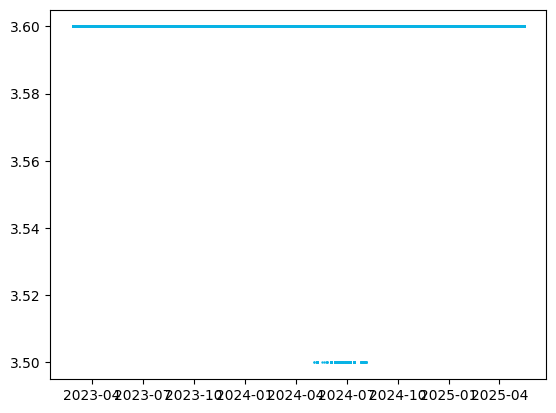

In [12]:
# Battery visualisation
x = bin_sensor_missing_df["time"]
y = bin_sensor_missing_df["battery"]
plt.scatter(x, y, s=0.5,color='#08b3e5')
plt.show() 

This is very interesting, what this shows us is that the sensors only fail to report their `sensor_name` when they reach around 3.6-3.5% battery life. From this we can assume that when a sensor is about to run out of battery life it will send out its data to the server before shutting down. That way it still shares its readings but it doesn't send the `sensor_name` along with it. So we can trace the data back. But we now know the source of the missing values.

Lets quickly check this against the main data set, since if they have lower data values then that might reveal some more information. Or challenge the evidence we have collected.

In [13]:
print(f"The lowest records of battery life in the main dataset are: {bin_sensor_df['battery'].min()}")
print(f"The lowest records of battery life in the missing dataset are: {bin_sensor_missing_df['battery'].min()}")

The lowest records of battery life in the main dataset are: 3.5
The lowest records of battery life in the missing dataset are: 3.5


Since this shows that the lowest `battery` reading in the data set is 3.5% this confirms our assumption, that is the lowest it can go before dropping out. It provides some information before going down. That means we should re-organise the data since it is no longer ‘missing’ but rather it is from sensors that ran out of battery. So I will create a new data frame for Out Of Battery or `oob_bin_sensors` where we can change the `sensor_name` to OOB since we didn't lose the data and it still might contain good data. But we want to remove the `null` values.

In [14]:
# new dataframe with new name
oob_bin_sensor = bin_sensor_missing_df
oob_bin_sensor['sensor_name'] = oob_bin_sensor['sensor_name'].fillna('OOB')

/tmp/ipykernel_28715/704315207.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oob_bin_sensor['sensor_name'] = oob_bin_sensor['sensor_name'].fillna('OOB')


In [15]:
oob_bin_sensor.head()

,dev_id,time,temperature,filllevel,battery,sensor_name
3,r718x-6f10,2024-10-13 03:03:40+00:00,22.7,89.0,3.6,OOB
5,r718x-6f10,2024-10-13 04:03:40+00:00,22.5,89.0,3.6,OOB
8,r718x-6f10,2024-10-06 04:03:29+00:00,22.1,89.0,3.6,OOB
11,r718x-6f33,2024-09-21 16:52:11+00:00,12.0,89.0,3.6,OOB
12,r718x-6f10,2024-09-21 17:03:06+00:00,19.9,89.0,3.6,OOB


### 4.3 Are the sensors even functional when failing?
Now we have figured out the cause of the data loss, the fact that the sensors often lose battery and can't give a full report raises a good question. What if this data is not good? We should see the `filllevel` and `temperature` and check if there is any outliers or bad data within. We should be remove anything that will skew our data.

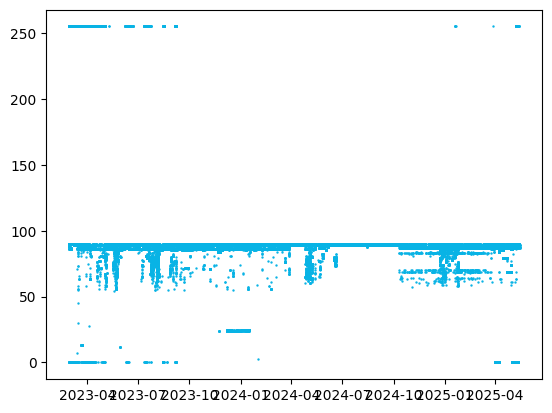

In [16]:
# filllevel visualisation
x = oob_bin_sensor["time"]
y = oob_bin_sensor["filllevel"]
plt.scatter(x, y, s=0.5,color='#08b3e5')
plt.show() 

In [17]:
print(f"The lowest records of filllevel in the OOB dataset are: {oob_bin_sensor['filllevel'].min()}",
      f"\nThe highest records of filllevel in the OOB dataset are: {oob_bin_sensor['filllevel'].max()}")

The lowest records of filllevel in the OOB dataset are: 0.0 
The highest records of filllevel in the OOB dataset are: 255.0


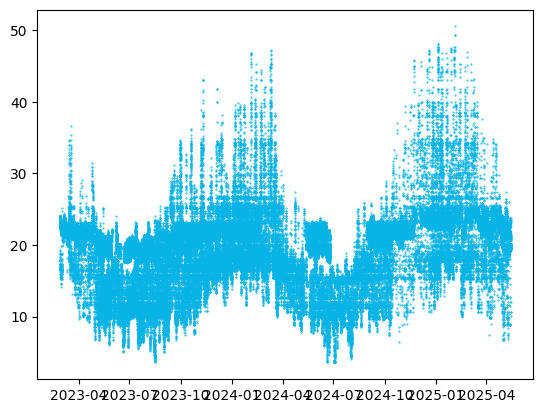

In [18]:
# temperature visualisation
x = oob_bin_sensor["time"]
y = oob_bin_sensor["temperature"]
plt.scatter(x, y, s=0.2,color='#08b3e5')
plt.show() 

In [19]:
print(f"The lowest records of temperature in the OOB dataset are: {oob_bin_sensor['temperature'].min()}",
      f"\nThe highest records of temperature in the OOB dataset are: {oob_bin_sensor['temperature'].max()}")

The lowest records of temperature in the OOB dataset are: 3.6 
The highest records of temperature in the OOB dataset are: 50.5


What we know now is *why* the sensors fail. Its due to their battery dropping and they make one last call home before going offline. Now those visualusations indicate that the data does have some outliers. But this might not be caused by *just* the out of battery bins. So lets check the data on the full set and if they share the same problems we can merge them together.
## 5 Merging the data

we can finally merge our `oob_bin_sensor_clean` with the main dataset through the `.update` function since the index is still the same. This means our “bad” data can easily be removed. Then we will have cleaned up our data and are ready to move onto the visualisation step with minimal data loss.

In [20]:
# New dataframe copied from original
bin_sensor_df_norm = bin_sensor_df.copy()
# drop null values
bin_sensor_df_norm.dropna()

,dev_id,time,temperature,filllevel,battery,sensor_name
0,r718x-6f0b,2024-10-27T04:02:18+00:00,22.4,255.0,3.6,r718x-bin sensor 14
1,r718x-676c,2024-10-27T04:03:05+00:00,21.8,90.0,3.6,r718x-bin sensor 2
2,r718x-6f0b,2024-10-13T04:02:04+00:00,22.7,40.0,3.6,r718x-bin sensor 14
4,r718x-6f31,2024-10-13T04:02:36+00:00,23.0,74.0,3.6,r718x-bin sensor 19
6,r718x-6f0b,2024-10-06T04:01:58+00:00,22.5,255.0,3.6,r718x-bin sensor 14
...,...,...,...,...,...,...
1014897,r718x-6f31,2025-05-15T01:12:34+00:00,21.0,74.0,3.6,r718x-bin sensor 19
1014898,r718x-6773,2025-05-15T01:13:46+00:00,19.8,255.0,3.6,r718x-bin sensor 5
1014899,r718x-6f0b,2025-05-15T00:50:30+00:00,20.7,63.0,3.6,r718x-bin sensor 14
1014900,r718x-676c,2025-05-15T01:03:42+00:00,20.4,90.0,3.6,r718x-bin sensor 2


In [21]:
print(f"The lowest records of filllevel in the normal dataset are: {bin_sensor_df_norm['filllevel'].min()}",
      f"\nThe highest records of filllevel in the normal dataset are: {bin_sensor_df_norm['filllevel'].max()}")
print(f"The lowest records of temperature in the normal dataset are: {bin_sensor_df_norm['temperature'].min()}",
      f"\nThe highest records of temperature in the normal dataset are: {bin_sensor_df_norm['temperature'].max()}")

The lowest records of filllevel in the normal dataset are: 0.0 
The highest records of filllevel in the normal dataset are: 255.0
The lowest records of temperature in the normal dataset are: 2.1 
The highest records of temperature in the normal dataset are: 52.8


So after we dropped the null values from the dataset(which would include our OOB), we can see that it has the same issues with data projection so we can tackle that problem next. First let's merge our datasets.

In [22]:
# Create a new data frame for our cleaned and merge data:
bin_sensor_and_oob_df = bin_sensor_df
bin_sensor_and_oob_df.update(oob_bin_sensor)

In [23]:
# Check for any missing values we missed:
print(f"Missing data:\n{bin_sensor_and_oob_df.isnull().sum()}\n------\n",
      f"Total missing values: {len(bin_sensor_and_oob_df[bin_sensor_and_oob_df.isnull().any(axis=1)])}\nTotal values: {len(bin_sensor_and_oob_df)}",
      f"\nPercent of missing values: {round((len(bin_sensor_and_oob_df[bin_sensor_and_oob_df.isnull().any(axis=1)])/len(bin_sensor_and_oob_df))*100,2)}%")

Missing data:
dev_id          0
time            0
temperature    78
filllevel      78
battery        78
sensor_name     0
dtype: int64
------
 Total missing values: 78
Total values: 1014902 
Percent of missing values: 0.01%


Well here we have a reading that we only lost 0.01% of our overall data. Which is a fantastic result rather than dropping almost 13% of our data. Now we just need to complete the cleaning. We can remove the 0.01% of missing values and we can move onto cleaning our data.

In [24]:
bin_sensor_and_oob_df.dropna()

,dev_id,time,temperature,filllevel,battery,sensor_name
0,r718x-6f0b,2024-10-27T04:02:18+00:00,22.4,255.0,3.6,r718x-bin sensor 14
1,r718x-676c,2024-10-27T04:03:05+00:00,21.8,90.0,3.6,r718x-bin sensor 2
2,r718x-6f0b,2024-10-13T04:02:04+00:00,22.7,40.0,3.6,r718x-bin sensor 14
3,r718x-6f10,2024-10-13 03:03:40+00:00,22.7,89.0,3.6,OOB
4,r718x-6f31,2024-10-13T04:02:36+00:00,23.0,74.0,3.6,r718x-bin sensor 19
...,...,...,...,...,...,...
1014897,r718x-6f31,2025-05-15T01:12:34+00:00,21.0,74.0,3.6,r718x-bin sensor 19
1014898,r718x-6773,2025-05-15T01:13:46+00:00,19.8,255.0,3.6,r718x-bin sensor 5
1014899,r718x-6f0b,2025-05-15T00:50:30+00:00,20.7,63.0,3.6,r718x-bin sensor 14
1014900,r718x-676c,2025-05-15T01:03:42+00:00,20.4,90.0,3.6,r718x-bin sensor 2


## 6 Cleaning the data
These results seem to show that the `temperature` has been reliable, it might read higher since the sensor is in a metal bin and they would heat up to pretty high heats on hot summer days. But the `filllevel` seems to show data that is for the most part consistent at around 90% but has no data at 100% instead there are a few outlier data values at 250%, but those readings seem to be consistent. So what I think is happening here is that when the sensor is overfilled or full it sends the reading of 250%. So what we will do to fix the data is to change those readings over 200% to be 100% and re-incorporate them into the data. That way we are minimising loss and representing the data better. If we need to remove those 100% readings to get a better idea of the non full data we can do that easily. What we can do is create a new column listing a rough fill level estimate e.g [empty, half, full, overfill]

In [25]:
# Change filllevel 250 to 100
bin_sensor_and_oob_df.loc[bin_sensor_and_oob_df['filllevel'] > 200, 'filllevel'] = 100

In [26]:
# describe new data
bin_sensor_and_oob_df.describe()

,temperature,filllevel,battery
count,1.014824e+06,1.014824e+06,1.014824e+06
mean,1.866132e+01,7.551555e+01,3.599903e+00
std,5.300840e+00,1.499044e+01,3.115532e-03
min,2.100000e+00,0.000000e+00,3.500000e+00
25%,1.520000e+01,7.100000e+01,3.600000e+00
50%,1.880000e+01,7.400000e+01,3.600000e+00
75%,2.280000e+01,8.900000e+01,3.600000e+00
max,5.280000e+01,1.000000e+02,3.600000e+00


Lets visualise this change quickly so we can get a better idea of the changes. But we also need to adjust the `time` column again:

In [27]:
# Convert time again so it is usable
bin_sensor_and_oob_df['time'] = pd.to_datetime(bin_sensor_and_oob_df['time'], utc=True)
print(f"This changes the value so it will work: {bin_sensor_and_oob_df.time.dtype}\n\n") 

This changes the value so it will work: datetime64[ns, UTC]




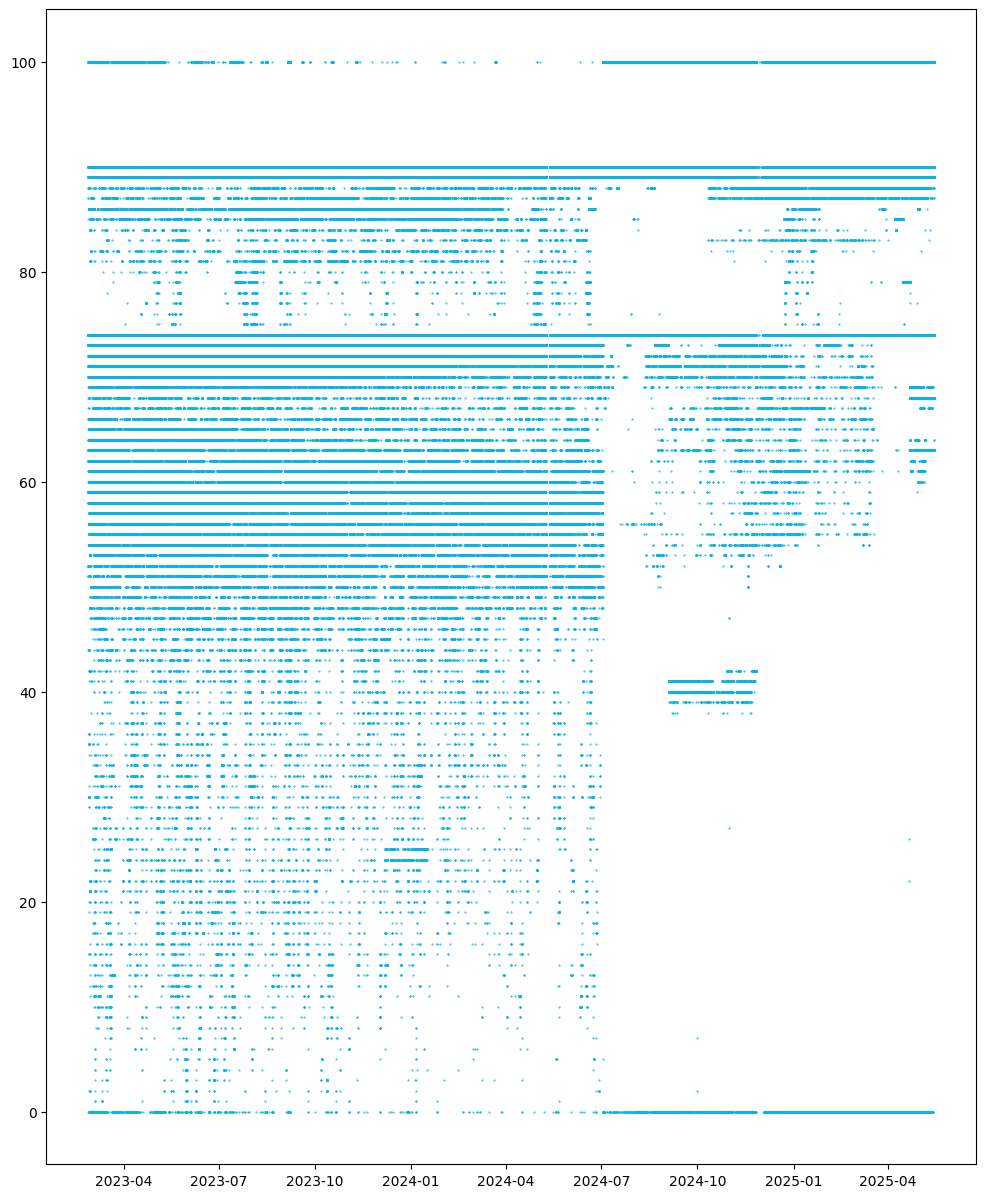

In [28]:
# Lets re-visualise the filllevel
x = bin_sensor_and_oob_df["time"]
y = bin_sensor_and_oob_df["filllevel"]
plt.figure(figsize=(12, 15)) 
plt.scatter(x, y, s=0.2,color='#08b3e5')

plt.show() 

After plotting all of the data on one enlarged graph we can see the effects of the changes we had made. First we can see the adjusted 100% values make up a large portion of our data visually. So it will be worth investigating how full the bins are and create categories for them as a means to make our analysis easier. The other thing that is clear is that the data seems to stop collecting middling values below roughly 50% after 07/24. This split is something we should look into as well. We should also continue the investigation into when bins are offline and it would be valuable to see what bins are used most often.


These are a few different points to look into and some of them will have some information that might overlap (for example if the bins are offline at night more often we might see a drop in the average `filllevel`). So let's begin by looking into the `filllevel` as that can give us a lot of information about how efficient the bin sensors are and let us know how much they have been used. 


## 7 Fill level investigation

Lets begin this part of our analysis by creating categories or ‘bins’ for the data. This is a method to split up the data based on the `filllevel` percentage. That way we can know where higher values sit compared to one another. Since the data seems to be (at least visually from the previous sections graph) higher let's count by 20% until we reach 50% then we can increase each bin by an increment of 10% for each bin. That way we can see more of a difference between the higher values without having too many smaller categories making the larger ones harder to read.
### 7.1 Creating Categories

In [29]:
# Create bins for splitting data
fill_level_bins = [-1, 20, 40, 50, 60, 70, 80, 90, 100]
# Create lables for the bin categories
fill_level_labels = [
    '0-20%',
    '20-40%',
    '40-50%',
    '50-60%',
    '60-70%',
    '70-80%',
    '80-90%',
    '90-100%',
]
# Apply the bins to the dataset by and add a new column
bin_sensor_and_oob_df['fillcategories'] = pd.cut(
    bin_sensor_and_oob_df['filllevel'],
    bins=fill_level_bins,
    labels=fill_level_labels,
)
bin_sensor_and_oob_df

,dev_id,time,temperature,filllevel,battery,sensor_name,fillcategories
0,r718x-6f0b,2024-10-27 04:02:18+00:00,22.4,100.0,3.6,r718x-bin sensor 14,90-100%
1,r718x-676c,2024-10-27 04:03:05+00:00,21.8,90.0,3.6,r718x-bin sensor 2,80-90%
2,r718x-6f0b,2024-10-13 04:02:04+00:00,22.7,40.0,3.6,r718x-bin sensor 14,20-40%
3,r718x-6f10,2024-10-13 03:03:40+00:00,22.7,89.0,3.6,OOB,80-90%
4,r718x-6f31,2024-10-13 04:02:36+00:00,23.0,74.0,3.6,r718x-bin sensor 19,70-80%
...,...,...,...,...,...,...,...
1014897,r718x-6f31,2025-05-15 01:12:34+00:00,21.0,74.0,3.6,r718x-bin sensor 19,70-80%
1014898,r718x-6773,2025-05-15 01:13:46+00:00,19.8,100.0,3.6,r718x-bin sensor 5,90-100%
1014899,r718x-6f0b,2025-05-15 00:50:30+00:00,20.7,63.0,3.6,r718x-bin sensor 14,60-70%
1014900,r718x-676c,2025-05-15 01:03:42+00:00,20.4,90.0,3.6,r718x-bin sensor 2,80-90%


With these categories created we can make a count of them. This will print each of the fill levels from highest to lowest. While it initally looks a bit awkward to read it quickly makes sense to have an ordered list of the results.

In [30]:
# Get the number of times each category appears in the data
category_val_count = bin_sensor_and_oob_df['fillcategories'].value_counts()
category_val_count

fillcategories
70-80%     372533
80-90%     347080
50-60%     124505
60-70%      88008
90-100%     42633
40-50%      20713
20-40%      10945
0-20%        8407
Name: count, dtype: int64

We can see from this that most of our data is around 70-80% full followed by 80-90%, then 50-60%. This is interesting as this tells us that most of the times out bins are at near full capacity. While this is helpful, we can visualise this data to know the difference between them better. And from that point we can begin to make educated guesses on why this might be.

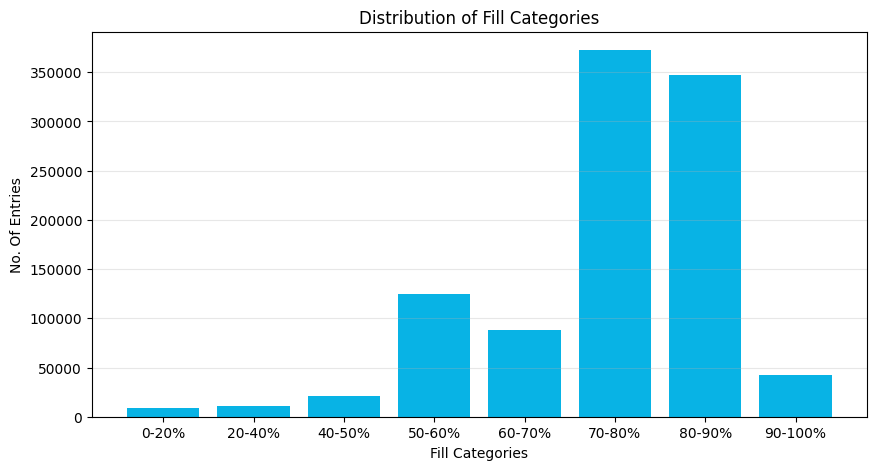

In [31]:
# Sort the data by the index
category_val_count = category_val_count.sort_index()
# Create new figure and size it
plt.figure(figsize=(10, 5))
# Make bar chart from our category_val_count. Use the values from it and the fillcategories as the index
plt.bar(category_val_count.index.astype(str), category_val_count.values, color='#08b3e5')
# Labels
plt.xlabel('Fill Categories')
plt.ylabel('No. Of Entries')
plt.title('Distribution of Fill Categories')
# Make grid to make it more readable 
plt.grid(axis='y', linestyle='-', alpha=0.3)
plt.show()

With this we can see just how often the bin’s sensors are showing they are near or almost full. The majority of our data says the fill levels are between 70% and 90%. If this is the case, potentially it might be that the bins read this high as they are on overnight. So these high readings might be from them collecting litter throughout the day then being full over night. Lets investigate by taking these counts and applying them to the hours in a day.
### 7.2 Fill level throughout the day
Before we can plot our data on a time series we need to create a new column for hours. Since our data is already following the UTC standard this is easy for us to do using `.dt.hour`. Once we have that we can use `.groupby` to get the category counts per hour of the day. From that data we can plot it on a line graph.

In [32]:
# We create a new column to get the hours
bin_sensor_and_oob_df['hour'] = bin_sensor_and_oob_df['time'].dt.hour
# From that we can create a new dataframe that is made up of the counts of each reading taken at each hour
hourly_counts = bin_sensor_and_oob_df.groupby(['hour', 'fillcategories']).size().unstack(fill_value=0)
hourly_counts

/tmp/ipykernel_28715/921667261.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hourly_counts = bin_sensor_and_oob_df.groupby(['hour', 'fillcategories']).size().unstack(fill_value=0)


fillcategories,0-20%,20-40%,40-50%,50-60%,60-70%,70-80%,80-90%,90-100%
hour,,,,,,,,
0,412,517,817,5563,4008,14762,14338,1812
1,446,524,795,5579,3974,14989,14515,1814
2,418,525,783,5394,3998,15035,14419,1841
3,370,494,765,5403,3860,15271,14438,1876
4,360,473,785,5270,3824,15447,14472,1827
5,383,481,777,5296,3845,15646,14624,1856
6,356,460,806,5244,3729,15551,14667,1856
7,367,424,737,5138,3640,15367,14403,1877
8,341,472,729,5012,3573,15494,14269,1844


This new dataframe uses 24 hour time to show us each of the readings. And unfortunately it is clear that it is rather similar to the previous graph we had created. Let's still plot this and see visually if there is much of a difference.

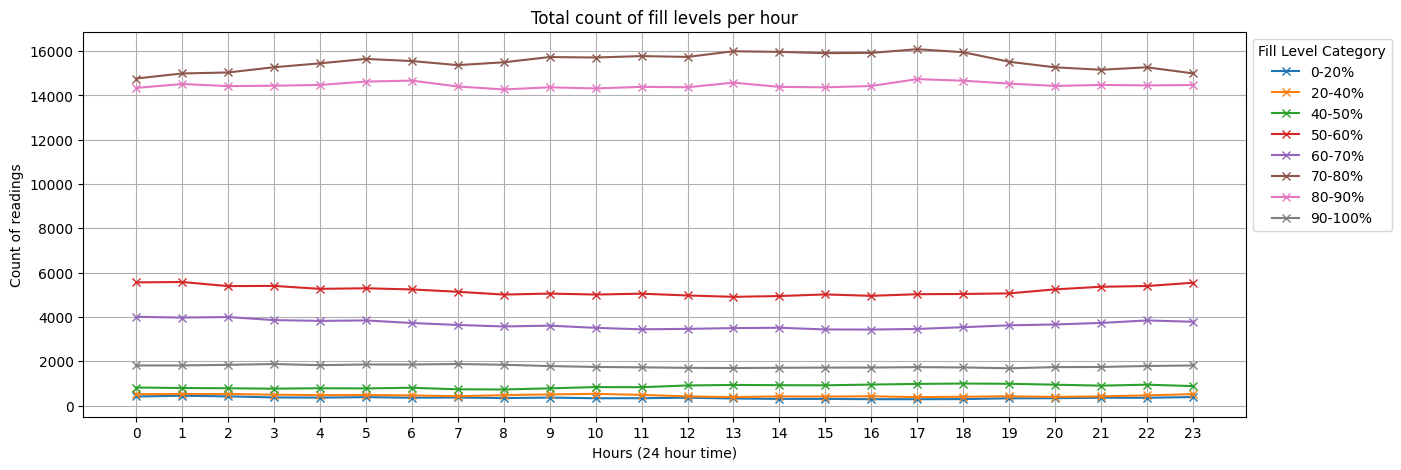

In [33]:
# We can generate a graph using plot and set a number of different labels
hourly_counts.plot(kind='line', figsize=(15, 5), 
                marker='x', title='Total count of fill levels per hour',
                xlabel='Hours (24 hour time)', ylabel = 'Count of readings',
                xticks=range(0, 24), grid=True)
# Set the ledgend to be outside the graph
plt.legend(title='Fill Level Category',bbox_to_anchor=(1.0, 1.0))
plt.show()

This graph shows us that the most common readings from our sensors is still between 70 and 90%. They have a staggering majority. Although there are some small tips at either end it is clear the bins are for the most part near full. This tells us that either the bins are cleared out infrequently and people don't often use them since they are nearly full or full and there is no more room for their rubbish. Or the sensors are in some way giving us bad readings. 


Potentially looking at the average fill percentage throughout the day might give us some insights to how often the bins are being used. Maybe we can see if there is a spike or a difference at specific times. And if the average gives the indication that in fact the bins are mostly full then that is good data for us.

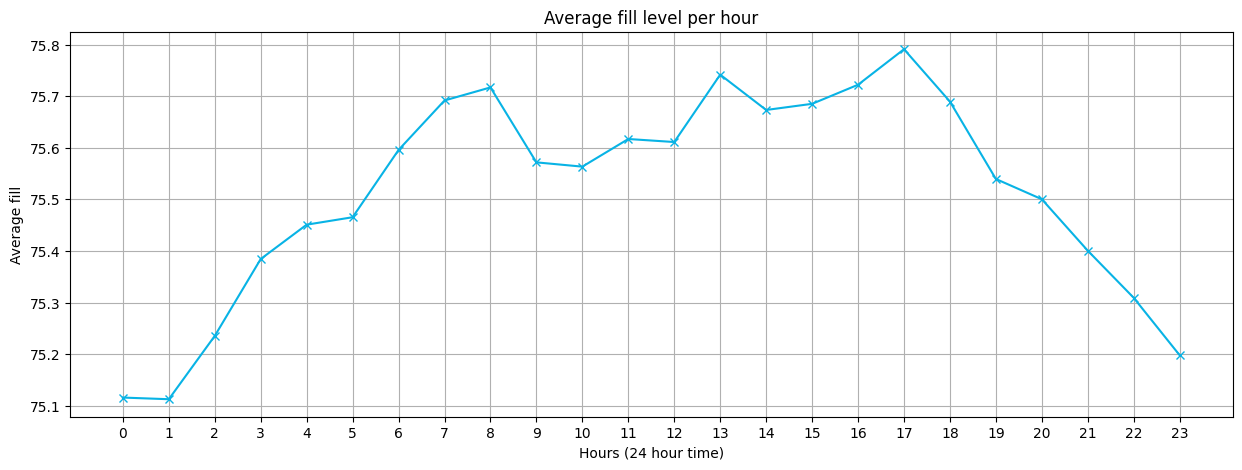

In [34]:
# Create new average count per hour by grouping the hours and getting the mean of the filllevel for each hour
hourly_avg = bin_sensor_and_oob_df.groupby('hour')['filllevel'].mean()
# We can generate a graph using plot and set a number of different labels
hourly_avg.plot(kind='line', figsize=(15, 5), 
                marker='x', title='Average fill level per hour',
                xlabel='Hours (24 hour time)', ylabel = 'Average fill',
                xticks=range(0, 24), grid=True, color='#08b3e5')
plt.show()

Here we can actually see that there is some reflection that the bins are used more throughout the day as the average dose increases during the daytime hours instead of at night. However, this isn't much as we can clearly see that the data sits between 75% and 76%. So we know that on average our sensors are telling us that the bins most of the time have only 25% capacity available.
### 7.3 Weekly and Monthly bin usage
We should still investigate the levels throughout the week as well. While the bins are mostly full consistently there is a chance that some days might have more waste than others (maybe we can see an uptick on weekends compared to weekdays). So using the same methods we can see the weekly usage of the bins rather than the hourly one we had just investigated. 


In [35]:
# We can call date time to split up for each of the days in the week
bin_sensor_and_oob_df['Day'] = bin_sensor_and_oob_df['time'].dt.day_name()
# Here we can take a count of each of each fill category
weekly_df = bin_sensor_and_oob_df.groupby(['Day', 'fillcategories']).size().unstack(fill_value=0)
# Set the days of the week in order
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_counts = weekly_df.reindex(days)
weekly_counts

/tmp/ipykernel_28715/139894605.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weekly_df = bin_sensor_and_oob_df.groupby(['Day', 'fillcategories']).size().unstack(fill_value=0)


fillcategories,0-20%,20-40%,40-50%,50-60%,60-70%,70-80%,80-90%,90-100%
Day,,,,,,,,
Monday,1127,1508,3333,18788,13115,52846,49740,5917
Tuesday,1231,1575,2592,18250,12896,53598,49670,6051
Wednesday,1117,1731,2990,18167,12772,53756,50284,6006
Thursday,1133,1551,2870,17136,12505,53192,49141,6352
Friday,1121,1387,2677,16622,12273,53525,49073,6248
Saturday,1376,1568,3005,16907,11695,53594,49414,6116
Sunday,1302,1625,3246,18635,12752,52022,49758,5943


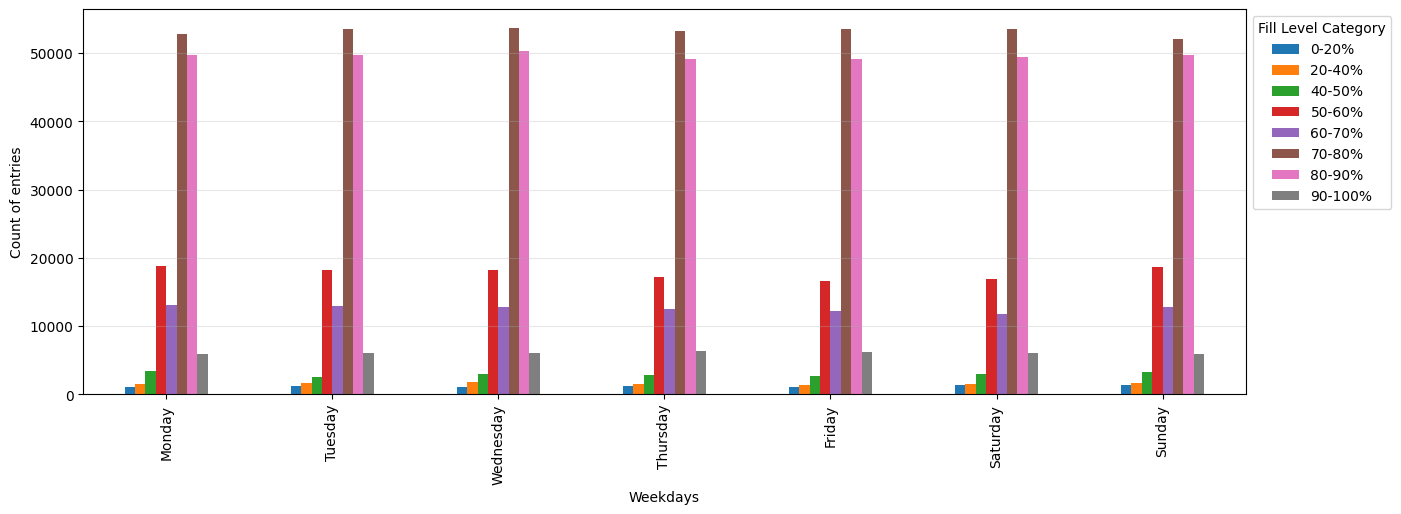

In [36]:
# Plot the weekly count and label it
weekly_counts.plot(kind='bar', figsize=(15, 5),ylabel="Count of entries", xlabel="Weekdays")
# Create grid to make it easier to read
plt.grid(axis='y', linestyle='-', alpha=0.3)
plt.legend(title='Fill Level Category',bbox_to_anchor=(1.0, 1.0))
plt.show()

This shows very similar results. While there is some small difference for example on Sundays we see a decrease in 70-80% counts. But overall we can see that throughout the week values between 70-90% dwarf the rest. This does give us a good indication that overall the bins are either under significant usage or our sensors seem to be giving readings that aren't great. If we recall our previous section where we noticed the split in data there was a gap sometime around 07-2024. Maybe this change has some effect on our data. Lets break our data down into each month and see if there is some difference. But let's do two things. First we will create a dataframe to have a count of the values from each month but we won't create a bar chart. Rather we will get an average fill level from each month and graph it on a line chart. Since a bar chart of multiple years will be hard to read.

In [37]:
# Create new column for the months within the dataset
bin_sensor_and_oob_df['Month'] = bin_sensor_and_oob_df['time'].dt.to_period('M') 
# create new Df with a group of all months and the cound of each category in them
monthly_counts = bin_sensor_and_oob_df.groupby(['Month', 'fillcategories']).size().unstack(fill_value=0)
monthly_counts

/tmp/ipykernel_28715/3229173670.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  bin_sensor_and_oob_df['Month'] = bin_sensor_and_oob_df['time'].dt.to_period('M')
/tmp/ipykernel_28715/3229173670.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_counts = bin_sensor_and_oob_df.groupby(['Month', 'fillcategories']).size().unstack(fill_value=0)


fillcategories,0-20%,20-40%,40-50%,50-60%,60-70%,70-80%,80-90%,90-100%
Month,,,,,,,,
2023-02,39,76,121,925,836,1816,661,235
2023-03,611,442,1293,9314,9230,23386,7146,2174
2023-04,213,617,1191,8578,7854,21729,4816,1426
2023-05,780,793,1712,9515,7591,20225,9299,265
2023-06,690,728,1510,8550,6249,20521,7747,288
2023-07,471,729,1730,9087,6496,20460,8286,383
2023-08,233,461,1590,7959,5796,19812,12742,62
2023-09,334,468,1344,7956,4429,16748,11473,192
2023-10,262,386,1026,6997,4083,14416,12403,17


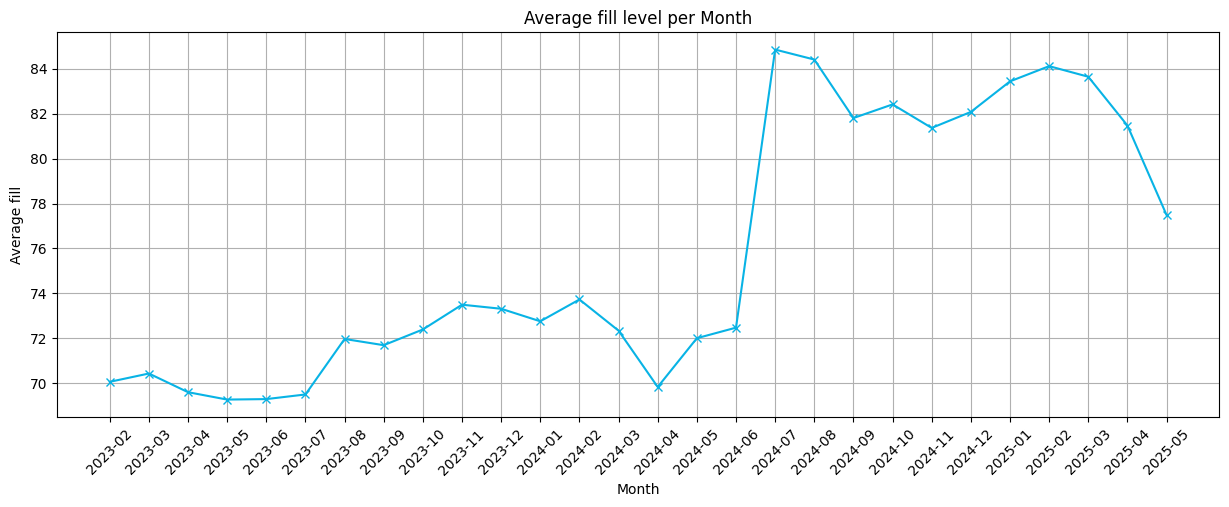

In [38]:
# Get the average fill level from each month
monthly_avg = bin_sensor_and_oob_df.groupby('Month')['filllevel'].mean()
# Create an index for each month stating the year and the month
monthly_avg.index = monthly_avg.index.strftime('%Y-%m')
# Plot the new monthly_avg
monthly_avg.plot(kind='line', figsize=(15, 5), 
                marker='x', title='Average fill level per Month',
                xlabel='Month', ylabel = 'Average fill',
                grid=True, color='#08b3e5')
# Set the x axis to show the monthly_avg index of each month and year. 
plt.xticks(ticks=range(len(monthly_avg.index)), labels=monthly_avg.index, rotation=45)
plt.show()


Here we can see a significant difference in the average fill level. The difference seems to be that after 2024-07 the data is far more concentrated at 80-90% and there is a significant drop in values under 50%. Some months have almost no readings in the 20-50% range. As such I believe this has pushed the readings to have a higher average fill level. THis seems to be a somewhat consistent change for almost the past year (at time of writing). Either the sensors have become faulty in some way by not reading the other entries. Or the server side that collects the data has changed how it processes the raw readings. There is some chance that there was a new building or increase in population of the area in that time. But due to the sudden spike and no documented completed plans It is most likely a change to how the data is processed. Since if it were a fault in the sensors they would not have all made such a dramatic change in a month span. So we can conclude that after 2024-07 the way the bin data is collected has changed, and due to that change no longer consistently collects data below 50%.

Overall from this section we have learnt:

- The top three categories for how full a bin is are: 1.”70-80%’ 2. ‘80-90%’ and 3. ‘50-60%’. However, the first and second both individually have more than double the the count of readings in the ‘50-60%’ category. Meaning the difference is rather large.
- However, readings at 90-100% or ‘over full’ readings are not common in our dataset.
- The average fill rate at the time of writing puts the data around 75%, there is an increase during the day and it falls at night. 
- We know that throughout the week for the most part the usage is much the same as there is little difference in the count of fill categories throughout the week.
    - This does indicate that potentially there isn't one day the bins are collected. Rather it happens at different times during the week
    - It also indicates that no days seem to be more likely to have full or empty bins than another day of the week.
- Finally we saw that there is a massive difference in the data collection and processing methods after 2024-07, As now the data indicates that the sensors are much less likely to detect if the fill level is below 50%. With some months never detecting any entries across all bin sensors. However, empty readings are still present. 
    - This has increased the average fill level to between 85% and 80%.


## 8 Change in bin data investigation
While this has given great insight into our data and a much better understanding of the fill level. We should also quickly investigate further into this change in data collection methods. Since we are seeing less entries under 50% we should investigate if that means we are collecting less data as a whole. Or is it collecting the same amount of data but just not as many below 50%.
### 8.1 Entries Per Month
To do this we are going to count the number of data points for each month and graph it as a bar chart.

/tmp/ipykernel_28715/828225261.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  monthly_counts = bin_sensor_and_oob_df.groupby(bin_sensor_and_oob_df['time'].dt.to_period('M')).size()


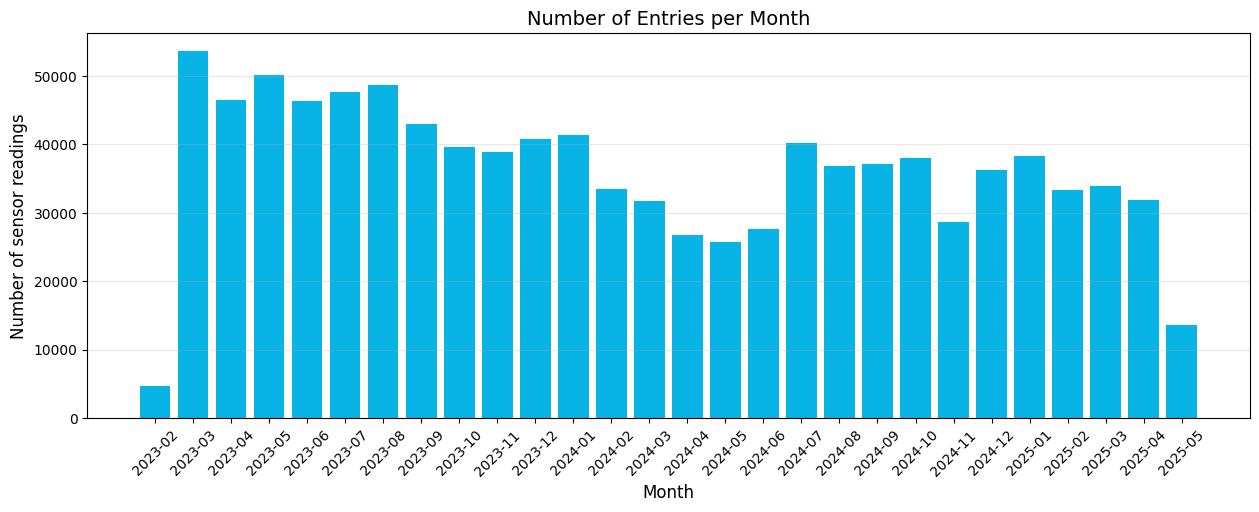

In [39]:
# Create new Data Frame from the count of each month in the 'time' collumn
monthly_counts = bin_sensor_and_oob_df.groupby(bin_sensor_and_oob_df['time'].dt.to_period('M')).size()
# Index them based on the time they had occured
monthly_counts.index = monthly_counts.index.to_timestamp()
# Create lavels with the year and the month for each
month_labels = monthly_counts.index.strftime('%Y-%m')

# Create the plot
plt.figure(figsize=(15, 5))
# The months are the X axis and the count is on the y axis
plt.bar(month_labels, monthly_counts.values, color='#08b3e5')
# Label the data
plt.title('Number of Entries per Month', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of sensor readings', fontsize=12)
plt.xticks(rotation=45)
# Create grid
plt.grid(axis='y', linestyle='-', alpha=0.3)
plt.show()

The take away from this is very interesting. What we can clearly see is that the last and newest months are the smallest because they are being replaced as new entries come in. But we can see a significant dip in the number of readings after 2023 and the readings are less consistent. To investigate this loss let's look at all of the sensors and their first and last readings. That way if we have lost sensors we can know why we have been having less readings.

To do this we can group the most recent readings using `idxmax` to get the most recent times. Then we can take out those values and make a smaller dataframe and sort and print it.

In [40]:
# Get the most recent time for each sensor
latest_sensor_group = bin_sensor_and_oob_df.groupby('sensor_name')['time'].idxmax()
# Grab that list of values and put it into a new pandas data frame
latest_sensor_readings = bin_sensor_and_oob_df.loc[latest_sensor_group].reset_index(drop=True)
# We sort by the months of their most recent readings
latest_sensor_readings = latest_sensor_readings.sort_values('Month')
# Print the name and month
print(latest_sensor_readings[['sensor_name', 'Month']])

            sensor_name    Month
14  r718x-bin sensor 21  2023-08
21   r718x-bin sensor 9  2024-07
2   r718x-bin sensor 10  2024-07
3   r718x-bin sensor 11  2024-07
4   r718x-bin sensor 12  2024-07
7   r718x-bin sensor 15  2024-07
20   r718x-bin sensor 8  2024-07
15   r718x-bin sensor 3  2024-07
19   r718x-bin sensor 7  2024-12
8   r718x-bin sensor 16  2025-02
18   r718x-bin sensor 6  2025-05
17   r718x-bin sensor 5  2025-05
16   r718x-bin sensor 4  2025-05
0                   OOB  2025-05
12   r718x-bin sensor 2  2025-05
11  r718x-bin sensor 19  2025-05
9   r718x-bin sensor 17  2025-05
6   r718x-bin sensor 14  2025-05
5   r718x-bin sensor 13  2025-05
1    r718x-bin sensor 1  2025-05
13  r718x-bin sensor 20  2025-05
10  r718x-bin sensor 18  2025-05


This shows us that out of our 21 sensors (OOB being the 22nd). We can see that a few sensors have dropped out in the last few years most during 2024. Sensors 21, 9, 10, 11, 12, 15, 8, 3, 7 and 16 have stopped reporting in that order and thus are no longer contributing to the dataset. Let’s check the sensor's first readings as if they are put in at different times it might make the data loss more complex. But if they all are the most recent then we have an easy solution as to why our dataset has changed. Simply there are less sensors operating.

In [41]:
# Get the most recent time for each sensor
latest_sensor_group = bin_sensor_and_oob_df.groupby('sensor_name')['time'].idxmin()
# Grab that list of values and put it into a new pandas data frame
latest_sensor_readings = bin_sensor_and_oob_df.loc[latest_sensor_group].reset_index(drop=True)
# We sort by the months of their most recent readings
latest_sensor_readings = latest_sensor_readings.sort_values('Month')
# Print the name and month
print(latest_sensor_readings[['sensor_name', 'Month']])

            sensor_name    Month
0                   OOB  2023-02
19   r718x-bin sensor 7  2023-02
18   r718x-bin sensor 6  2023-02
17   r718x-bin sensor 5  2023-02
16   r718x-bin sensor 4  2023-02
15   r718x-bin sensor 3  2023-02
14  r718x-bin sensor 21  2023-02
13  r718x-bin sensor 20  2023-02
12   r718x-bin sensor 2  2023-02
11  r718x-bin sensor 19  2023-02
10  r718x-bin sensor 18  2023-02
9   r718x-bin sensor 17  2023-02
8   r718x-bin sensor 16  2023-02
7   r718x-bin sensor 15  2023-02
6   r718x-bin sensor 14  2023-02
5   r718x-bin sensor 13  2023-02
4   r718x-bin sensor 12  2023-02
3   r718x-bin sensor 11  2023-02
2   r718x-bin sensor 10  2023-02
1    r718x-bin sensor 1  2023-02
20   r718x-bin sensor 8  2023-02
21   r718x-bin sensor 9  2023-02


We can see that all of the sensors were operating at the same time early in our data set. So what is clearly illustrated is that the sensors throughout their time have dropped out. We also know that Argyle Square park has not been under any construction in that time. Seemingly the Argyle Square smart park initiative is still operating today. So the reason for the drop out might be that they have reduced the active sensors due to costs. Or the bins might have been replaced with ones that don't have sensors or many of the sensors failed at the same time as they were installed at a similar time and that is the end of their shelf life. We can see the effect on our data though now there are only 11 out of the 21 sensors still operating. And the ones that are left seem to not be as able to detect lower fill level readings.

### 8.2 Visualisation of fill level with split data

What we can do to further visualise and understand the effect this has had on our data is we can split the data on the date we had lost the sensors and visualise how the `filllevel` readings have been affected by the loss in sensors. We will create one historical data frame and a current data frame. That way we can plot both `filllevels` and compare.

In [42]:
# Set the date to split the data
split_date = pd.Timestamp('2024-07-03', tz='UTC') 
# Create DF for before that date
historical_data = bin_sensor_and_oob_df[bin_sensor_and_oob_df['time'] < split_date].copy()
# Create DF on that date and after
current_data  = bin_sensor_and_oob_df[bin_sensor_and_oob_df['time'] >= split_date].copy()
# Comapre sizes
print(f"Historic data size: {historical_data.shape[0]}")
print(f"Current data size: {current_data.shape[0]}")

Historic data size: 648626
Current data size: 366276


<Axes: xlabel='time', ylabel='filllevel'>

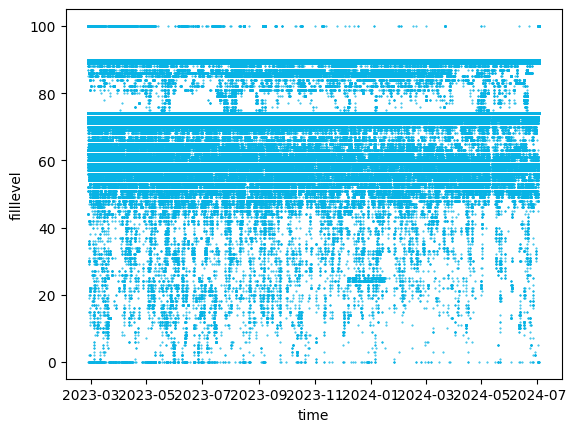

In [43]:
historical_data.plot(kind="scatter",y='filllevel',x='time', s=0.2,color='#08b3e5')

<Axes: xlabel='time', ylabel='filllevel'>

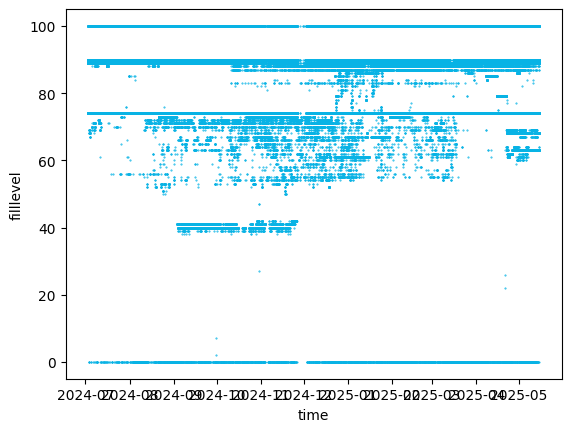

In [44]:
current_data.plot(kind="scatter",y='filllevel',x='time', s=0.2,color='#08b3e5')

This highlights the difference in the data plots. The historic data shows far more middle levels and has less 100% entries which could indicate a misreading of the sensor in some way. Where our current dataset is much more sparse and shows more misreadings of 100% as well as more gaps in the readings. So we can make the assumption that more recent data is less accurate and encompassing than before.

## 9 Out of Battery Sensors
We should also take time out to investigate the OOB sensors. They make up over 10% of our dataset and should be analysed. First thing we should check is when the OOB readings occur. Since the sensors use solar panels to charge the onboard batteries we can make the assumption that they will have a lot of readings at night but they will drop as the sun rises and then slowly dissipate throughout the day.

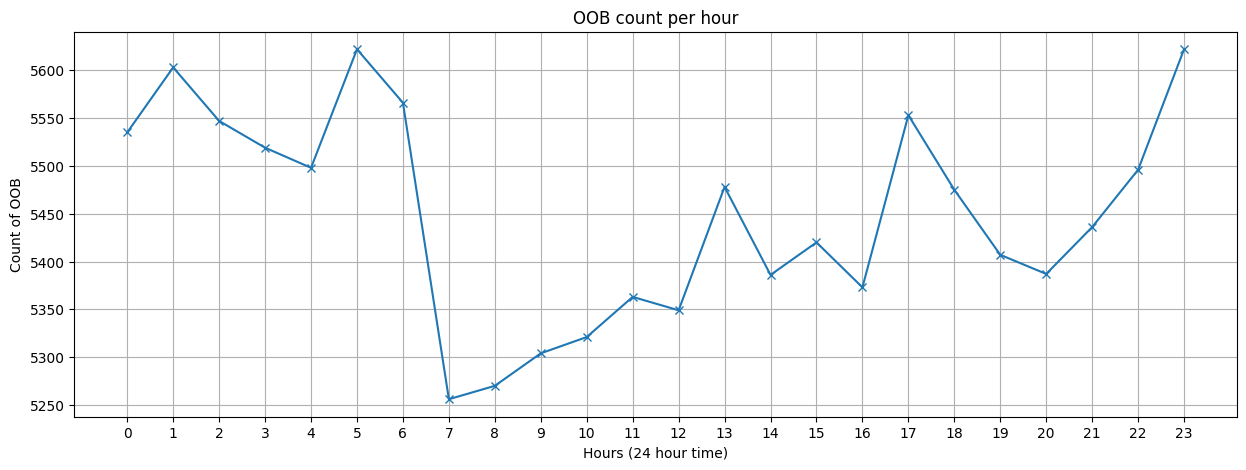

In [45]:
# Create DF on all sensors named OOB
oob_df = bin_sensor_and_oob_df[bin_sensor_and_oob_df['sensor_name'] == 'OOB']
# Create groups on the hours
oob_hourly_counts = oob_df.groupby('hour').size()
# Plot based on counts of data entries each hour
oob_hourly_counts.plot(kind='line', figsize=(15, 5), 
                marker='x', title='OOB count per hour',
                xlabel='Hours (24 hour time)', ylabel = 'Count of OOB',
                xticks=range(0, 24), grid=True)
plt.show()

Here we can see that our hypothesis was correct. There is a massive drop in sensors at 7pm since the sunrise would turn them back on. And we can see a few spikes throughout the night but overall the OOB sensors increase throughout the day with a peak at night time. However, it is worth noting that the difference is a few hundred entries. The dataset as a whole has at a minimum over 5250 OOB entries per hour. This indicates that the OOB sensors come up quite a lot and make a massive difference to our dataset.

Next we should check if the OOB sensors are a recent phenomena or have affected the historic data. Since we have seen a few sensors drop out it is worth checking if the OOB sensors have been affected too.


In [46]:
# Take the length of the current dataset
total_count = len(current_data)
# Get the length of all OOB sensors
oob_count = (current_data['sensor_name'] == 'OOB').sum()
# Devide and get the percentage
oob_percentage = (oob_count / total_count) * 100
print(f"OOB Percentage on current data: {oob_percentage:.2f}%")

OOB Percentage on current data: 12.59%


In [47]:
# Repeat same steps as before
total_count = len(historical_data)
oob_count = (historical_data['sensor_name'] == 'OOB').sum()
oob_percentage = (oob_count / total_count) * 100
print(f"OOB Percentage on historic data: {oob_percentage:.2f}%")

OOB Percentage on historic data: 13.06%


## 10 Conclusion.

Overall we are done with the analysis of the Argyle Square bin data. We have covered a lot of facets of the dataset and learnt a lot about the smart bin program now that it is a few years down the line. You have pulled the data down from the API and you have used pandas and matplotlib to analyse the data through visuals and printing key information. These have gotten you to work with sensor values as well as time series data. YOu have also cleaned and wrangeld a massive loss of 13% of missing data and saved it. With this done let's analyse what we have learnt about the Argyle Square smart bin program and see how these devices have gone on. And we can use this as a case study to see how the smart bins in the Melbourne CBD might be affected too.

The first thing we noticed is that roughly 13% of all of the sensor data is made when a sensor is shutting down from losing battery. While this does increase when the sun goes down and the sensors shut down as they are solar powered. This happens most of the time at all times of the day. So it cannot be just attributed to the loss of power from a lack of solar power. We also know that it is a consistent issue throughout the dataset. 

The next issue we encountered is the misreading from `filllevel` which showed the error of having 255% full. We had made the assumption in this analysis that this was caused by a bin overfilling. But it should be flagged as this could mean that the bins are being overfill frequently and thus need to be taken out more. Or the bins sensors are giving false readings that are dispositionally higher than the rest of the bin readings. Neither option is good and both should be flagged as an issue with the smart bins. 

Another issue we had noted with the bin sensors is very similar. That is that the bins give readings the average fill level of the bins is over 70%. This is concerning as either the bins are consistently at or over 70% capacity and should be taken out more often. Or just as before this is a problem with the sensor's outputs. If they are not scanning when they aren't full then they don't provide good data. And if it is a sensor issue then we know that it also provides unbalanced or unrepresentative data. 

Another potential issue with the data is that the bins that after July of 2024 we had seen the data changes significantly. This is because a few sensors had stopped giving data at around that point. While some others did also stop giving data before and after then the majority dropped out at that time. This means a total of 10 of the total 21 sensors have been down for almost a year. So we are only collecting which means we are only collecting 52% of our potential data. We also have noticed the current operating sensors do not often give readings below 50%. All of this could indicate flaws with the sensors hardware or a software issue that is affecting them. While we do not know what the cause is we do know that more recent data will be partially inaccurate at collecting data.

So going forward when using this dataset we should be careful as much of the data appears to be inaccurate and gives potentially bad results. Either due to the sensors giving weighted readings or that almost half of the sensors are not providing data. So we can conclude that the sensors from this investigation are not operating well 3 years into the smart park project. They most likely need some form of replacement or maintenance as the data they provide can be very helpful for helping municipal councils handle the influxes and demand Melbourne city often needs due to it hosting so many national and international events.

Note: since this investigation is defined a lot by the time it was made and if this is looked at later I have saved the API pull as `UC00150_bin_data.csv`. Simply replace the API call with the code provided below:

In [48]:
# bin_sensor_df = pd.read_csv('UC00150_bin_data.csv')